## Bài 1: build scratch hard SVM

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1) # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

In [2]:
X.shape, y.shape

((2, 200), (1, 200))

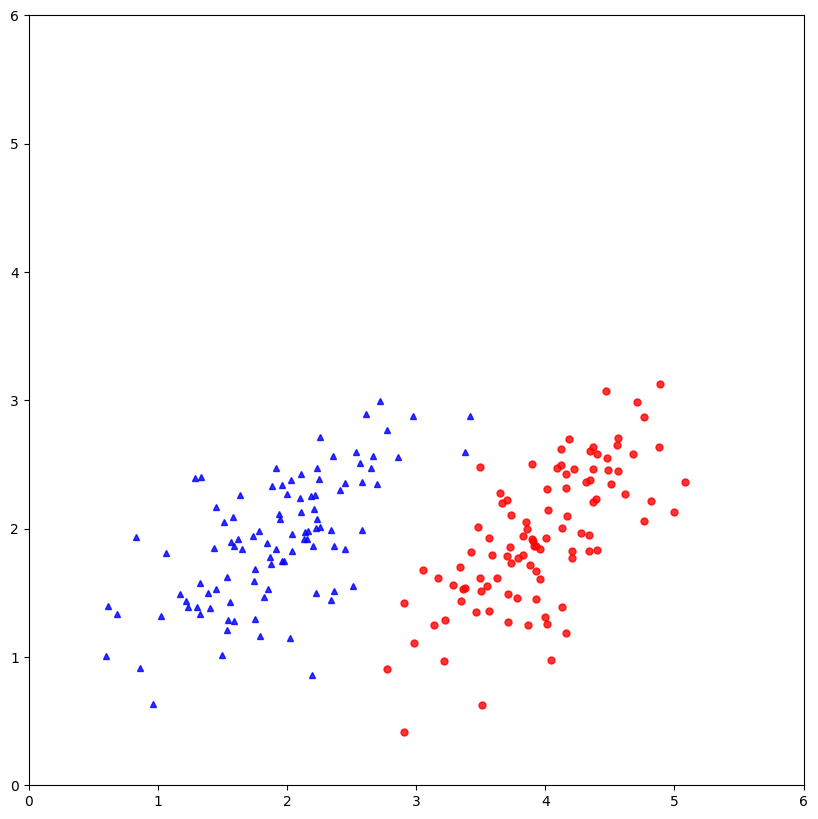

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([0 , 6, 0, 6])
plt.show()

In [5]:
from cvxopt import matrix, solvers
# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394978e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265241e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750933e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883549e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685467e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [6]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.24141785932256


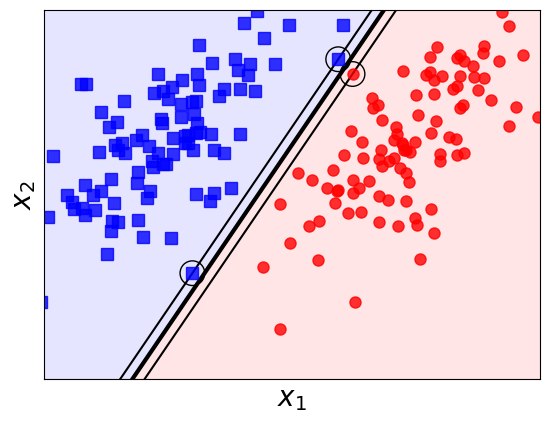

In [7]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('D:\\svm4hardmargin.pdf') as pdf:
  # draw
  # plot points
  fig, ax = plt.subplots()
  x1 = np.arange(-10, 10, 0.1)
  y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
  y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
  y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
  plt.plot(x1, y1, 'k', linewidth = 3)
  plt.plot(x1, y2, 'k')
  plt.plot(x1, y3, 'k')
  y4 = 10*x1
  plt.plot(x1, y1, 'k')
  plt.fill_between(x1, y1, color='red', alpha=0.1)
  plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
  plt.axis('equal')
  plt.ylim(0, 3)
  plt.xlim(2, 4)
  # hide tikcs
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])
  # add circles around support vectors
  for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)
  plt.xlabel('$x_1$', fontsize = 20)
  plt.ylabel('$x_2$', fontsize = 20)
    # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
    # pdf.savefig()
  plt.show()

In [8]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


## Bài tập tự thực hành 1

In [9]:
def predict(X, w, w0):
  return np.sign(w0 + w.T*X)


In [36]:
y_pred = predict(X, w, w0)
print("accuracy_score %.2f" % (np.mean(y_pred == y)*100.) + " %")

accuracy_score 100.00 %


## Bài tập tự thực hành 2

In [37]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to rest record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size = 0.3, random_state = 109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [38]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e5)
model.fit(X_train, y_train)

SVC(C=100000.0, kernel='linear')

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
print("accuracy_score: {%.2f}" % (accuracy_score(y_test, y_pred)))
print("confusion matrix: ", confusion_matrix(y_test, y_pred))

accuracy_score: {0.96}
confusion matrix:  [[ 61   2]
 [  4 104]]


## Ví dụ 2

In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('sonar.all-data.csv', header = None)

In [50]:
df.head()
df.shape

(208, 61)

In [51]:
df[60] = df[60].replace({'R' : -1, 'M' : 1})

In [52]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,1


In [55]:
y = df[60]
X = df.drop(columns = [60], axis = 0)

In [56]:
y.shape, X.shape

((208,), (208, 60))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [59]:
X_train.shape, y_train.shape

((145, 60), (145,))

In [60]:
from sklearn.svm  import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
model = SVC(kernel='linear', C = 1e5)
model.fit(X_train, y_train)

SVC(C=100000.0, kernel='linear')

In [61]:
y_pred = model.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))
print('confusion matrix: ', confusion_matrix(y_test, y_pred))

accuracy:  0.746031746031746
confusion matrix:  [[20  8]
 [ 8 27]]
